In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


In [2]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = '/home/abert/Documents/NumeriCube/eurosilicone/gcaesthetics-implantbox/step4_letter_detection/models/resnet50_csv_11_inf.h5'

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '/', 11: 'A', 12: 'B', 13: 'C', 14: 'D', 15: 'E', 16: 'F', 17: 'G', 18: 'H', 19: 'I', 20: 'J', 21: 'K', 22: 'L', 23: 'M', 24: 'N', 25: 'O', 26: 'P', 27: 'Q', 28: 'R', 29: 'S', 30: 'T', 31: 'U', 32: 'V', 33: 'W', 34: 'X', 35: 'Y', 36: 'Z'}



Instructions for updating:
Colocations handled automatically by placer.


/home/abert/.virtualenvs/test/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [13]:
def draw_caption(image, box, caption):
    """ Draws a caption above the box in an image.

    # Arguments
        image   : The image to draw on.
        box     : A list of 4 elements (x1, y1, x2, y2).
        caption : String containing the text to draw.
    """
    b = np.array(box).astype(int)
    cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 4, (252, 0, 0), 2)
    cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 4, (0, 255, 255), 1)

(1614, 1614, 3)


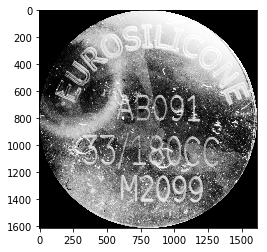

processing time1:  0.3168630599975586
processing time2:  0.35992860794067383
[[[287.07367 589.30695 368.49893 712.5685 ]
  [348.1682  294.29654 420.5675  424.93567]
  [530.68536 591.7825  619.09436 719.94867]
  ...
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]
  [ -1.       -1.       -1.       -1.     ]]]
scale2 =  0.49566294919454773
[[[ 579.17114 1188.9268   743.4466  1437.6069 ]
  [ 702.4294   593.7433   848.49493  857.3077 ]
  [1070.6577  1193.9211  1249.0228  1452.4965 ]
  ...
  [  -2.0175    -2.0175    -2.0175    -2.0175 ]
  [  -2.0175    -2.0175    -2.0175    -2.0175 ]
  [  -2.0175    -2.0175    -2.0175    -2.0175 ]]]
[[ 0.982054    0.92662525  0.8368583   0.79968274  0.7876941   0.7565585
   0.74361086  0.6909492   0.68820417  0.6513189   0.61996526  0.60046613
   0.5476501   0.524586    0.48496473  0.47801852  0.47539508  0.47359875
   0.4726596   0.4655569   0.44431576  0.43579695  0.41863367  0.41046882
   0.40037256  0.38765547  0.3

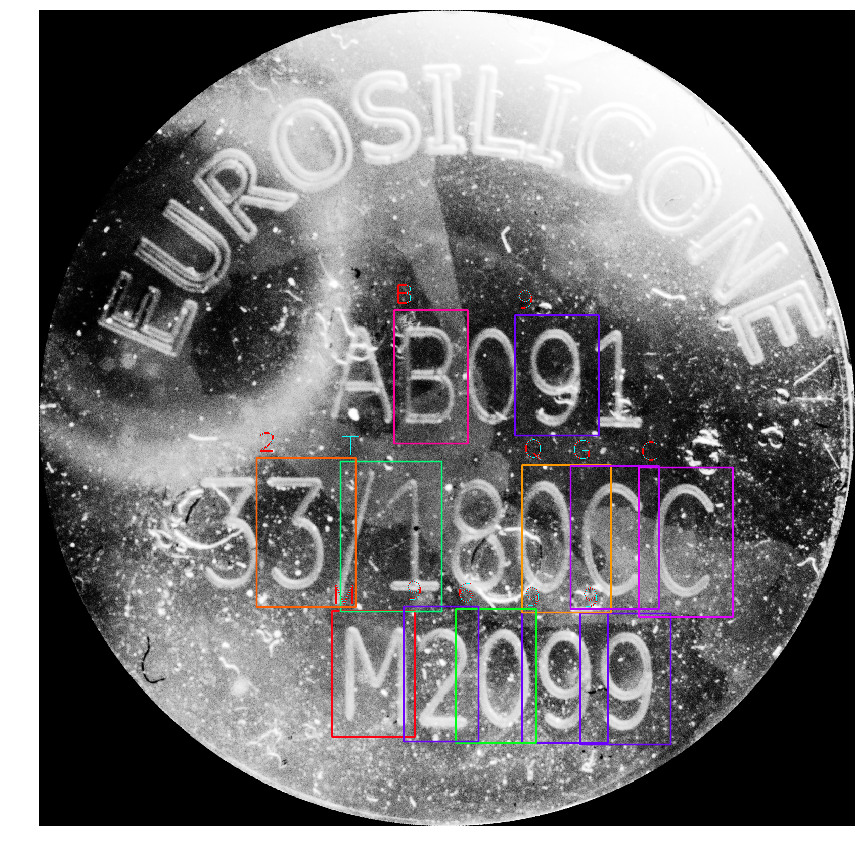

In [16]:
# load image
start = time.time()
image = cv2.imread('/home/abert/Documents/NumeriCube/eurosilicone/gcaesthetics-implantbox/dataset/step4_ocr/ds_step4_letters/FULL-2019-05-16-150054.png',1)

size = image.shape

WIDTH = 800
HEIGHT = 800
#image2 = cv2.resize(image,(WIDTH,HEIGHT))
#scale1 = size[0]/800
#print('scale1 = ', scale1)

print(image.shape)
#image2 = cv2.equalizeHist(image2)
plt.imshow(image)
plt.show()
#image2 = cv2.cvtColor(image2,cv2.COLOR_GRAY2RGB)

# copy to draw on
draw = image.copy()

# preprocess image for network

image = preprocess_image(image)
image, scale2 = resize_image(image)

print("processing time1: ", time.time() - start)
# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time2: ", time.time() - start)
print(boxes)

# correct for image scale
print('scale2 = ', scale2)
#boxes *=scale1/scale2
boxes /= scale2 
print(boxes)
print('====================')
print(scores)
print('====================')
# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    print(score)
    # scores are sorted so we can break
    if score < 0.6:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, labels_to_names[label],)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw, cmap='gray')
plt.show()